In [31]:
# Import
import numpy as np
import json
import os.path as osp

from collections import namedtuple
from typing import List

In [32]:
# Constant
METHODS = {
    'knn': {'folder_result': '../results/knn',
            'json_file': 'results_general.json'},
    's_knn': {'folder_result': '../results/s_knn',
            'json_file': 'results_general.json'},
    'gnn': {'folder_result': '../results/gnn',
            'json_file': 'stats_gnn_training.json'}
}

In [46]:
class Experiment:
    
    def __init__(self, dataset: str, method: str, experiment_folders: List[str]) -> None:
        """
        
        """
        self.dataset = dataset
        self.method = method
        
        self.experiments = {name_exp: osp.join(METHODS[method]['folder_result'], dataset, name_exp)
                            for name_exp in experiment_folders}
        self.experiments_data = {}
        
        self._load_json_data()
        
    def _load_json_data(self) -> None:
        """Load the results data from json file"""
        for name_exp, folder_exp in self.experiments.items():
            filename = osp.join(folder_exp, METHODS[self.method]['json_file'])
            with open(filename, 'r') as file:
                data = json.load(file)
                
            self.experiments_data[name_exp] = data


experiments_knn = [
    Experiment('enzymes', 'knn', ['baseline', 'reduced_graphs_gnn_50','50_dim_node_32',  '25', '25_freeze', '25_dim_node_32']),
    # Experiment('enzymes', 's_knn', ['r_graphs_vec_dim_16', 'r_graphs_vec_dim_8', 'r_graphs_vec_dim_4', 'r_graphs_dim_32_epoch_10', '25_dim_node_32']),
    Experiment('NCI1', 'knn', ['baseline_more_seeds','reduced_graphs_gnn_50', '50_dim_node_32',  '25', '25_freeze', '25_dim_node_32']),
    Experiment('mutagenicity', 'knn', ['baseline_more_seeds', 'reduced_graphs_gnn_50', '50_dim_node_32', '25', '25_freeze', '25_dim_node_32']),
    Experiment('proteins', 'knn', ['baseline_more_seeds', 'reduced_graphs_gnn_50', '50_dim_node_32', '25', '25_freeze', '25_dim_node_32']),
    # Experiment('proteins', 's_knn', [ 'r_graphs_dim_32_epoch_10',]),
    Experiment('dd', 'knn', ['baseline_more_seeds', 'reduced_graphs_gnn_50', '50_dim_node_32', '25', '25_freeze', '25_dim_node_32']),
]

experiments_gnn = [
    Experiment('ENZYMES', 'gnn', ['50']),
    # Experiment('ENZYMES', 'gnn', ['50']),
    Experiment('NCI1', 'gnn', ['50']),
    Experiment('Mutagenicity', 'gnn', ['50']),
    Experiment('PROTEINS', 'gnn', ['50']),
    # Experiment('PROTEINS', 'gnn', ['50']),
    Experiment('DD', 'gnn', ['50']),
]

In [85]:
def accuracies_time_knn(data_knn, statistics):
    for name_exp, data in data_knn.items():
        val_acc = []
        accuracies = []
        prediction_times = []
        names = []
        parameters = []
        
        for exp_title, exp_res in data.items():
            if exp_title == 'parameters':
                continue
            
            try:
                names.append(exp_title)
                parameters.append(exp_res['best_params'])
                val_acc.append(exp_res['best_acc'])
                accuracies.append(exp_res['acc_test'])
                prediction_times.append(exp_res['prediction_time_test'])
            except KeyError:
                pass
        
        np_val_acc = np.array(val_acc[:5])
        np_accuracies = np.array(accuracies[:5])
        np_prediction_times = np.array(prediction_times[:5])
        
        name_exp = 'baseline_more_seeds' if name_exp == 'baseline' else name_exp
        
        statistics[name_exp] = {}
        statistics[name_exp]['acc_test'] = np_accuracies
        statistics[name_exp]['time'] = np_prediction_times
        
        print(f'{name_exp}')
        print(f'Number of runs: {len(np_accuracies)} (with different seeds)')
        print(f'Mean acc val: {np.mean(np_val_acc):.2f}±{np.std(np_val_acc):.2f}')
        print(f'Mean acc test: {np.mean(np_accuracies):.2f}±{np.std(np_accuracies):.2f}')
        print(f'Max acc: {max(np_accuracies):.2f}; Min acc: {min(np_accuracies):.2f}')
        print(f'Mean time test {name_exp}: {np.mean(np_prediction_times):.2f}±{np.std(np_prediction_times):.2f}')
        
        print(names)
        print(parameters)
        print('val', [round(val, 2) for val in val_acc])
        print('test', [round(val, 2) for val in accuracies])
        
        print()

def accuracies_gnn(data_gnn, statistics):
    for name_exp, data in data_gnn.items():
        accuracies = []
        
        for exp_title, exp_res in data.items():
            if exp_title == 'parameters':
                continue
            
            try:
                accuracies.append(exp_res['best_test_acc'])
            except KeyError:
                pass

        np_accuracies = np.array(accuracies) * 100
        
        print(f'Number of runs: {len(np_accuracies)} (with different seeds)')
        print(f'Mean acc test of gnn training {name_exp}: {np.mean(np_accuracies):.2f}±{np.std(np_accuracies):.2f}')
        
        print()
            
        name_exp = 'baseline_more_seeds' if name_exp == 'baseline' else name_exp
        
        statistics['gnn'] = {}
        statistics['gnn']['acc_test'] = np_accuracies


    
statistics = {}     
for exps_knn, exps_gnn in zip(experiments_knn, experiments_gnn):
    print('-'*len(exps_knn.dataset))
    print(f'{exps_knn.dataset.upper()}')
    print('-'*len(exps_knn.dataset))
    

    statistics[exps_knn.dataset.upper()] = {}
    
    # print(exps_gnn.experiments_data['50'].items())
    accuracies_time_knn(exps_knn.experiments_data, statistics[exps_knn.dataset.upper()])
    accuracies_gnn(exps_gnn.experiments_data, statistics[exps_knn.dataset.upper()])
    
        
# experiments[0].experiments_data

-------
ENZYMES
-------
baseline_more_seeds
Number of runs: 5 (with different seeds)
Mean acc val: 51.83±4.20
Mean acc test: 50.33±4.43
Max acc: 58.33; Min acc: 45.00
Mean time test baseline_more_seeds: 10.75±2.69
['exp_1841', 'exp_277', 'exp_58', 'exp_16', 'exp_255', 'exp_1860', 'exp_657', 'exp_307', 'exp_1344', 'exp_1211']
[[1, 0.85], [1, 0.8], [1, 0.65], [1, 0.75], [1, 0.7], [1, 0.8], [1, 0.75], [1, 0.8], [1, 0.85], [1, 0.8]]
val [55.83, 55.0, 44.17, 50.83, 53.33, 56.67, 50.83, 55.83, 57.5, 55.0]
test [49.17, 45.0, 50.83, 58.33, 48.33, 49.17, 46.67, 45.0, 45.83, 51.67]

reduced_graphs_gnn_50
Number of runs: 5 (with different seeds)
Mean acc val: 47.00±4.55
Mean acc test: 43.50±2.86
Max acc: 47.50; Min acc: 40.00
Mean time test reduced_graphs_gnn_50: 5.06±0.65
['exp_1841', 'exp_277', 'exp_58', 'exp_16', 'exp_255', 'exp_1860', 'exp_657', 'exp_307', 'exp_1344', 'exp_1211']
[[1, 0.95], [1, 0.7], [3, 0.95], [3, 0.7], [1, 0.95], [5, 0.9], [1, 0.7], [3, 0.9], [3, 0.95], [1, 0.8]]
val [48.3

In [8]:
print(f'Mean acc test full size: {np.mean(np_test_acc):.2f}±{np.std(np_test_acc):.2f}')
print(f'Mean acc test 50% reduced: {np.mean(np_test_acc_50):.2f}±{np.std(np_test_acc_50):.2f}')

Mean acc test full size: nan±nan
Mean acc test 50% reduced: nan±nan


In [9]:
gnn_stats = {
    1860: {'val': 0.31, 'test': 0.23},
    1344: {'val': 0.38, 'test': 0.28},
    255: {'val': 0.34, 'test': 0.26},
    1841: {'val': 0.28, 'test': 0.17},
    277: {'val': 0.36, 'test': 0.35},
    58: {'val': 0.31, 'test': 0.27},
    16: {'val': 0.26, 'test': 0.33},
    307: {'val':  0.38, 'test': 0.30},
    657: {'val':  0.29, 'test': 0.24},
    1211: {'val':  0.36, 'test': 0.33},
}

In [10]:
np_test_train = np.array([stats['test'] for run, stats in gnn_stats.items()]) * 100

In [11]:
print(f'Mean acc test GNN: {np.mean(np_test_train):.2f}±{np.std(np_test_train):.2f}')

Mean acc test GNN: 27.60±5.18


In [12]:
print(np_test_train)

[23. 28. 26. 17. 35. 27. 33. 30. 24. 33.]


In [86]:
for dataset, values in statistics.items():
    print(dataset)
    print(values)

ENZYMES
{'baseline_more_seeds': {'acc_test': array([49.16666667, 45.        , 50.83333333, 58.33333333, 48.33333333]), 'time': array([ 8.22902894, 10.40810895, 12.14806867, 15.1347611 ,  7.82864618])}, 'reduced_graphs_gnn_50': {'acc_test': array([43.33333333, 47.5       , 40.83333333, 40.        , 45.83333333]), 'time': array([5.71955299, 5.26398683, 5.51963425, 3.882936  , 4.89476228])}, '50_dim_node_32': {'acc_test': array([38.33333333, 42.5       , 48.33333333, 45.        , 45.83333333]), 'time': array([3.58648086, 3.3288765 , 3.34592104, 3.28059697, 5.00707269])}, '25': {'acc_test': array([35.        , 26.66666667, 28.33333333, 29.16666667, 35.        ]), 'time': array([1.72050381, 1.48666549, 1.25197959, 1.45372748, 1.4164803 ])}, '25_freeze': {'acc_test': array([29.16666667, 36.66666667, 40.83333333, 26.66666667, 32.5       ]), 'time': array([2.26524043, 2.1649735 , 2.3203814 , 2.10236406, 2.78543854])}, '25_dim_node_32': {'acc_test': array([30.        , 36.66666667, 29.16666667,

ENZYMES
[(1.9, 0.3), (4.6, 0.7)]
NCI1
[(4.0, 0.6), (10.2, 0.8)]
MUTAGENICITY
[(3.8, 0.1), (9.4, 0.7)]
PROTEINS
[(3.1, 0.3), (8.5, 0.2)]
DD
[(2.5, 0.2), (12.5, 1.5)]
{'ENZYMES': [2.13, 4.62], 'NCI1': [3.72, 9.87], 'MUTAGENICITY': [3.6, 8.5], 'PROTEINS': [3.35, 8.82], 'DD': [2.15, 12.58]}


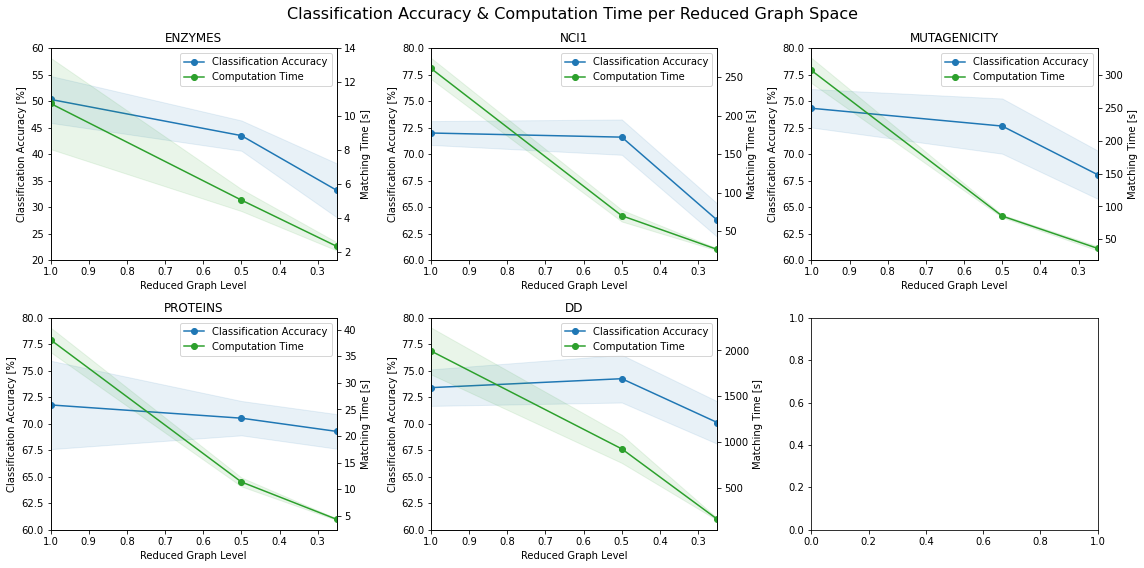

In [81]:
import numpy as np
import pandas as pd
import scipy.stats as st

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from matplotlib.gridspec import SubplotSpec

# datasets = ['AIDS', 'mutagenicity', 'NCI1', 'proteins_tu', 'enzymes', 'IMDB_binary']
# raw_data = [
#         [[98.53, 99.47, 98.87, 99.33, 98.73], [98.53, 99.33, 98.8,  99.07, 98.87]],
#         [[71.33, 70.43, 69.62, 64.53, 63.93], [71.33, 69.41, 69.79, 62.17, 56.44]],
#         [[70.33, 63.89, 61.37, 61.85, 60.66], [70.33, 64.93, 66.16, 63.6,  63.98]],
#         [[73.82, 71.67, 69.96, 72.1,  70.82], [73.82, 75.97, 72.96, 72.96, 72.53]],
#         [[41.67, 24.17, 28.33, 26.67, 22.5 ], [41.67, 35.,   30.83, 29.17, 23.33]],
#         [[66,    58.5,  61.5,  54.,   55.  ], [66,    60.5,  55,    59.5,  54.  ]]
#        ]
# centrality_measures = ['Pagerank', 'Betweenness', 'Random']

confidence = 0.95

rows, cols = 2, 3

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4*rows))

grid = plt.GridSpec(rows, cols)

speed_up_per_dataset = {}

for idx, (dataset, axes) in enumerate(zip(statistics, axs.flatten())):
    data_100 = statistics[dataset]['baseline_more_seeds']
    data_50 = statistics[dataset]['reduced_graphs_gnn_50']
    data_25 = statistics[dataset]['25_freeze']
    
    accs = [data_100['acc_test'], data_50['acc_test'], data_25['acc_test']]
    times = [data_100['time'], data_50['time'], data_25['time']]
    
    speed_up_per_dataset[dataset] = [round(np.mean(times[0]) / np.mean(time), 2)
                                     for time in times[1:]]
    print(dataset)
    print([(round(np.mean(times[0][:3] / time[:3]),1), round(np.std(times[0][:3] / time[:3]),1)) for time in times[1:]])

    title = f'{dataset} - Classification Accuracy & Computation Time per Reduced Graph Space'
        
    dataset = dataset[0].capitalize() + dataset[1:]
    
    axes.set_title(dataset)
    axes.set_xlim(1.0, 0.0)
    if dataset == 'ENZYMES':
        axes.set_ylim(20, 60)
    else:
        axes.set_ylim(60, 80)
    axes.set_ylabel('Classification Accuracy [%]')
    axes.set_xlabel('Reduced Graph Level')
    axes.set_xlim(1.0, 0.25)
    x = [1.0, 0.5, 0.25]
    acc_y = np.array([np.mean(val) for val in accs])
    acc_y_err = np.array([np.std(val) for val in accs])
    
    lns1 = axes.plot(x, acc_y, '-', color='tab:blue', label='Classification Accuracy', marker="o")
    axes.fill_between(x, acc_y - acc_y_err, acc_y + acc_y_err, alpha=0.1, color='tab:blue')
    
    ax2=axes.twinx()
    ax2.set_ylabel('Matching Time [s]')
    
    time_y = np.array([np.mean(val) for val in times])
    time_y_err = np.array([np.std(val) for val in times])
    
    lns2 = ax2.plot(x, time_y, color='tab:green', label='Computation Time', marker="o")
    ax2.fill_between(x, time_y - time_y_err, time_y + time_y_err, alpha=0.1, color='tab:green')
    # axes.plot(x, pagerank_data, '*', color='tab:blue', markersize=10, label='Pagerank')
    
    # axes.plot(x, betweenness_data, '-', color='tab:green')
    # axes.plot(x, betweenness_data, '^', color='tab:green', markersize=10, label='Betweenness')
    
    # axes.plot(x, acc_AVERAGE, '-', color='tab:blue')
    # axes.fill_between(x, y - y_err, y + y_err, alpha=0.2,color='tab:red')
    # axes.plot(x, y, 'o', color='tab:red', markersize=10, label='Random')
    
    lns = lns1 + lns2
    labs = [l.get_label() for l in lns]
    axes.legend(lns, labs, loc=0)
    # ax2.legend(loc=0)


fig.suptitle('Classification Accuracy & Computation Time per Reduced Graph Space', fontsize=16)
fig.tight_layout()
fig.savefig(f'./accuracies.png')

print(speed_up_per_dataset)

In [87]:
import os.path as osp
from collections import defaultdict
from itertools import product

folder_results_pagerank = '../results/re_run_h_knn'
filename = 'combined_results.txt'
datasets_pagerank = ['mutagenicity', 'NCI1', 'enzymes', 'proteins', 'dd']
seeds_pagerank = [str(val) for val in [1344, 1841, 1860, 255, 277]]

def get_results_pagerank(datasets, folder, seeds):
    results = {}
    for dataset in datasets:
        results[dataset] = {}
        results[dataset]['50'] = []
        results[dataset]['25'] = []

        for seed in seeds:
            path = osp.join(folder, dataset, seed, filename)

            with open(path, 'r') as f:
                data = f.readlines()

            exp_50, _, acc_50, time_50 = data[3].split(', ')
            results[dataset]['50'].append(float(acc_50))

            try:
                exp_25, _, acc_25, time_25 = data[9].split(', ')
                results[dataset]['25'].append(float(acc_25))
            except IndexError:
                pass
        
    return results
        
results_pagerank = get_results_pagerank(datasets_pagerank, folder_results_pagerank, seeds_pagerank)


In [88]:
import os.path as osp
from collections import defaultdict
from itertools import product

folder_results_random = '../results/re_run_h_knn_random'
filename = 'combined_results.txt'
datasets_random = [('enzymes', '277'), ('mutagenicity', '277'), ('NCI1', '277'), ('proteins_tu', '277'), ('dd', '1860')]

def get_results_random(datasets, folder):
    results = {}
    
    for dataset, seed in datasets:
        folder_tmp = f'{folder}_other_params' if dataset == 'proteins_tu' else folder
            
        path = osp.join(folder_tmp, dataset, seed, filename)

        with open(path, 'r') as f:
            data = f.readlines()
        
        dataset = dataset.split('_')[0]
        
        results[dataset] = {}

        
        # prin
        results[dataset]['50'] = [float(val.split(', ')[2]) for val in data[::3]][:5]
        results[dataset]['25'] = [float(val.split(', ')[2]) for val in data[::3]][10:15]

        
    return results

results_rand = get_results_random(datasets_random, folder_results_random)

print(results_rand)

{'enzymes': {'50': [25.0, 23.333333333333332, 25.0, 16.666666666666664, 25.833333333333336], '25': [24.166666666666668, 24.166666666666668, 21.666666666666668, 20.833333333333336, 19.166666666666668]}, 'mutagenicity': {'50': [66.3594470046083, 64.63133640552995, 63.47926267281107, 62.67281105990783, 65.09216589861751], '25': [59.44700460829493, 58.06451612903226, 59.44700460829493, 57.83410138248848, 61.75115207373272]}, 'NCI1': {'50': [59.36739659367397, 60.82725060827251, 58.51581508515815, 60.21897810218978, 58.3941605839416], '25': [60.21897810218978, 60.70559610705596, 59.24574209245742, 58.02919708029197, 55.839416058394164]}, 'proteins': {'50': [68.30357142857143, 67.85714285714286, 70.98214285714286, 69.64285714285714, 71.875], '25': [67.41071428571429, 61.60714285714286, 69.19642857142857, 69.64285714285714, 68.75]}, 'dd': {'50': [70.042194092827, 74.26160337552743, 73.83966244725738, 73.41772151898735, 70.88607594936708], '25': [71.30801687763713, 68.77637130801688, 73.417721

In [108]:
print(f'{"":<18} Baseline {"":<12} 50% {"":<19} 25%')
print(f'{"":<34} GNN {"":<6} Rand {"":<7} GNN {"":<6} Rand')
datasets = ['mutagenicity', 'NCI1', 'enzymes', 'proteins', 'dd']

import scipy.stats as stats

tabulate_results = []
comparison_results = []

for dataset in datasets:
    mean_knn_100 = np.mean(statistics[dataset.upper()]['baseline_more_seeds']['acc_test'])
    std_knn_100 = np.std(statistics[dataset.upper()]['baseline_more_seeds']['acc_test'])
    
    if dataset == 'dd':
        
    mean_gnn_100 = np.mean(statistics[dataset.upper()]['gnn']['acc_test'][:3])
    std_gnn_100 = np.std(statistics[dataset.upper()]['gnn']['acc_test'][:3])
    
    mean_gnn_50 = np.mean(statistics[dataset.upper()]['reduced_graphs_gnn_50']['acc_test'])
    std_gnn_50 = np.std(statistics[dataset.upper()]['reduced_graphs_gnn_50']['acc_test'])
    # mean_pagerank_50 = np.mean(results_pagerank[dataset]['50'])
    # std_pagerank_50 = np.std(results_pagerank[dataset]['50'])
    mean_rand_50 = np.mean(results_rand[dataset]['50'])
    std_rand_50 = np.std(results_rand[dataset]['50'])
    
    mean_gnn_25 = np.mean(statistics[dataset.upper()]['25_freeze']['acc_test'])
    std_gnn_25 = np.std(statistics[dataset.upper()]['25_freeze']['acc_test'])
    # mean_pagerank_25 = np.mean(results_pagerank[dataset]['25'])
    # std_pagerank_25 = np.std(results_pagerank[dataset]['25'])
    mean_rand_25 = np.mean(results_rand[dataset]['25'])
    std_rand_25 = np.std(results_rand[dataset]['25'])
    
    ####################
    
    two_sample = stats.ttest_ind(statistics[dataset.upper()]['baseline_more_seeds']['acc_test'],
                                 statistics[dataset.upper()]['reduced_graphs_gnn_50']['acc_test'])
    stat_sig_comp_KNN_50 = '*' if two_sample.pvalue <= 0.05 else ''
        
    two_sample = stats.ttest_ind(statistics[dataset.upper()]['baseline_more_seeds']['acc_test'],
                                 statistics[dataset.upper()]['25_freeze']['acc_test'])
    stat_sig_comp_KNN_25 = '*' if two_sample.pvalue <= 0.05 else ''
    
    two_sample = stats.ttest_ind(statistics[dataset.upper()]['gnn']['acc_test'],
                                 statistics[dataset.upper()]['reduced_graphs_gnn_50']['acc_test'])
    stat_sig_comp_GNN_50 = '+' if two_sample.pvalue <= 0.05 else ''
        
    two_sample = stats.ttest_ind(statistics[dataset.upper()]['gnn']['acc_test'],
                                 statistics[dataset.upper()]['25_freeze']['acc_test'])
    stat_sig_comp_GNN_25 = '+' if two_sample.pvalue <= 0.05 else ''
    
    ####################
    
    two_sample = stats.ttest_ind(statistics[dataset.upper()]['reduced_graphs_gnn_50']['acc_test'],
                                 results_pagerank[dataset]['50'])

    stat_sig_rand_50 = '*' if two_sample.pvalue <= 0.05 else ''
        
    two_sample = stats.ttest_ind(statistics[dataset.upper()]['25_freeze']['acc_test'],
                                 results_pagerank[dataset]['25'])

    stat_sig_rand_25 = '*' if two_sample.pvalue <= 0.05 else ''
    
    # print(
    #     f'{dataset.upper():<15} - '
    #     # f'{mean_gnn_100:.2f}±{std_gnn_100:.2f} | '
    #     # f'{mean_gnn_50:.2f}±{std_gnn_50:.2f}, {mean_pagerank_50:.2f}±{std_pagerank_50:.2f}, {mean_rand_50:.2f}±{std_rand_50:.2f} | '
    #     # f'{mean_gnn_25:.2f}±{std_gnn_25:.2f}, {mean_pagerank_25:.2f}±{std_pagerank_50:.2f}, {mean_rand_25:.2f}±{std_rand_50:.2f}'
    #     f'{mean_gnn_100:.2f}±{std_gnn_100:.2f} | '
    #     f'{mean_gnn_50:.2f}±{std_gnn_50:.2f}, {mean_rand_50:.2f}±{std_rand_50:.2f} | '
    #     f'{mean_gnn_25:.2f}±{std_gnn_25:.2f}, {mean_rand_25:.2f}±{std_rand_50:.2f}'
    #      )
    tabulate_results.append([dataset.upper(),
                             #f'{mean_gnn_100:.1f}±{std_gnn_100:.1f}',
                             f'{mean_gnn_50:.1f}±{std_gnn_50:.1f}',
                             f'{mean_rand_50:.1f}±{std_rand_50:.1f}{stat_sig_rand_50}',
                             f'{mean_gnn_25:.1f}±{std_gnn_25:.1f}',
                             f'{mean_rand_25:.1f}±{std_rand_50:.1f}{stat_sig_rand_25}'])
    
    comparison_results.append([
         dataset.upper(),
         f'{mean_knn_100:.1f}±{std_knn_100:.1f}',
         f'{mean_gnn_100:.1f}±{std_gnn_100:.1f}',
         f'{mean_gnn_50:.1f}±{std_gnn_50:.1f}{stat_sig_comp_KNN_50}{stat_sig_comp_GNN_50}',
         f'{mean_gnn_25:.1f}±{std_gnn_25:.1f}{stat_sig_comp_KNN_25}{stat_sig_comp_GNN_25}'
    ])
print(tabulate_results)
print(comparison_results)

                   Baseline              50%                     25%
                                   GNN        Rand         GNN        Rand
[['MUTAGENICITY', '72.6±2.6', '64.4±1.3', '68.1±2.3', '59.3±1.3*'], ['NCI1', '71.6±1.7', '59.5±0.9*', '63.8±1.6', '58.8±0.9*'], ['ENZYMES', '43.5±2.9', '23.2±3.3*', '33.2±5.1', '22.0±3.3*'], ['PROTEINS', '70.5±1.6', '69.7±1.5', '69.3±1.6', '67.3±1.5'], ['DD', '74.3±2.2', '72.5±1.7', '70.1±2.0', '71.6±1.7*']]
[['MUTAGENICITY', '74.3±1.8', '73.3±4.4', '72.6±2.6', '68.1±2.3*'], ['NCI1', '72.0±1.1', '67.0±2.3', '71.6±1.7+', '63.8±1.6*'], ['ENZYMES', '50.3±4.4', '26.1±3.7', '43.5±2.9*+', '33.2±5.1*'], ['PROTEINS', '71.8±4.2', '70.2±2.4', '70.5±1.6', '69.3±1.6'], ['DD', '73.4±1.7', '67.9±3.1', '74.3±2.2+', '70.1±2.0']]


In [136]:
100*10*2 / 60

33.333333333333336

In [40]:
arr = [70.04, 74.26, 73.83, 73.41, 70.88, 76.79, 72.15]
np.mean(arr), np.std(arr)

(73.05142857142857, 2.0965511037444924)

In [32]:
((600 + 732 + 100 + 500 + 900) * 1 ) / 3600

0.7866666666666666

In [26]:
print(speed_up_per_dataset)

[['ENZYMES', 2.1260585117852426, 4.618214134640927], ['NCI1', 3.7219888146745306, 9.867873061845357], ['MUTAGENICITY', 3.5999510788566647, 8.500118353520435], ['PROTEINS', 3.3538403010493334, 8.81910967243083], ['DD', 2.154456029484032, 12.57651548947148]]


In [21]:
from tabulate import tabulate

In [71]:
speed_up_per_dataset_ = [[d] + values for d, values in speed_up_per_dataset.items()]
header = ['', 'speed up 100 vs 50', 'speed up 100 vs 25']

# print(tabulate(speed_up_per_dataset, headers=header, tablefmt='latex'))

In [74]:
print(tabulate(speed_up_per_dataset_, headers=header))

                speed up 100 vs 50    speed up 100 vs 25
------------  --------------------  --------------------
ENZYMES                       2.13                  4.62
NCI1                          3.72                  9.87
MUTAGENICITY                  3.6                   8.5
PROTEINS                      3.35                  8.82
DD                            2.15                 12.58


In [99]:
print(tabulate(tabulate_results, headers=["", "", "", "", "", ""], tablefmt='latex'))

\begin{tabular}{lllll}
\hline
              &          &           &          &           \\
\hline
 MUTAGENICITY & 72.6±2.6 & 64.4±1.3  & 68.1±2.3 & 59.3±1.3* \\
 NCI1         & 71.6±1.7 & 59.5±0.9* & 63.8±1.6 & 58.8±0.9* \\
 ENZYMES      & 43.5±2.9 & 23.2±3.3* & 33.2±5.1 & 22.0±3.3* \\
 PROTEINS     & 70.5±1.6 & 69.7±1.5  & 69.3±1.6 & 67.3±1.5  \\
 DD           & 74.3±2.2 & 72.5±1.7  & 70.1±2.0 & 71.6±1.7* \\
\hline
\end{tabular}


In [109]:
print(tabulate(comparison_results, headers=["", "", "", "", "", ""], tablefmt='latex'))

\begin{tabular}{lllll}
\hline
              &          &          &            &           \\
\hline
 MUTAGENICITY & 74.3±1.8 & 73.3±4.4 & 72.6±2.6   & 68.1±2.3* \\
 NCI1         & 72.0±1.1 & 67.0±2.3 & 71.6±1.7+  & 63.8±1.6* \\
 ENZYMES      & 50.3±4.4 & 26.1±3.7 & 43.5±2.9*+ & 33.2±5.1* \\
 PROTEINS     & 71.8±4.2 & 70.2±2.4 & 70.5±1.6   & 69.3±1.6  \\
 DD           & 73.4±1.7 & 67.9±3.1 & 74.3±2.2+  & 70.1±2.0  \\
\hline
\end{tabular}
